Project: InstaBot - II

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
from selenium.webdriver.support.select import Select
from selenium.webdriver.support import expected_conditions as Ec
from selenium.webdriver.support.ui import WebDriverWait
# unkomws 
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from collections import OrderedDict
from datetime import datetime,timedelta

In [2]:
driver=webdriver.Chrome(executable_path='chromedriver')
driver.get('https://www.instagram.com/')
driver.maximize_window()
wait=WebDriverWait(driver,10)
username='SAMPLE_USERNAME'
password='SAMPLE_PASSWORD'

In [3]:
def Login_To_Insta(userName,Password):
        try:
                wait.until(Ec.presence_of_element_located((By.NAME,'username'))).send_keys(userName) 
                wait.until(Ec.presence_of_element_located((By.NAME,'password'))).send_keys(Password)
                butn=wait.until(Ec.presence_of_element_located((By.XPATH,'//button[@class="_acan _aiit _acap _aijb _acas _aj1-"]'))).submit()
                not_now_btn=wait.until(Ec.presence_of_element_located((By.XPATH,'//div[@class="_ac8f"]//button'))).click()
                wait.until(Ec.presence_of_element_located((By.XPATH,'//div[@class="_a9-z"]//button[1]'))).click()
        except TimeoutException:
                print("something went wrong")

In [4]:
Login_To_Insta(username,password)

Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2 Now Find the number of posts these handles have done in the previous 3 days.
3 Depict this information using a suitable graph.

ANSWER 1
1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [5]:
def search(string):
  search_btn=driver.find_element(By.LINK_TEXT,'Search').click()
  wait.until(Ec.presence_of_element_located((By.CLASS_NAME,'_aauy')))
  search_box=driver.find_element(By.CLASS_NAME,'_aauy')
  search_box.send_keys(string)
  

In [11]:
search('food')



[]


In [32]:
page_name=[]
data=driver.find_elements(By.CLASS_NAME,'_abm4')
# print(data)
cnt=1
for i in data:
  html=i.get_attribute('innerHTML')
  res=BeautifulSoup(html,'html.parser')
  a=res.find('a')
  # print(a)
  name=a.get('href')
  name=name[1:len(name)-1]
  page_name.append(name)
  cnt=cnt+1
  if(cnt==10):
    break
print(page_name)
 

['foodie_sangli', 'indian_street_food_page', 'foodish_punekar', 'foodzeee', 'solapuri_food', 'travelandfoodexplorer', 'food', 'explore/tags/food', 'ohmyfoodiefood']


In [49]:
# btn=driver.find_element(By.CLASS_NAME,'_ab6-')
# btn.click()
# sleep(3)
ans={}
for i in range (len(page_name)):
  search(page_name[i])
  # sleep(7)
  wait.until(Ec.presence_of_element_located((By.CLASS_NAME,'_abm4')))
  btn=driver.find_element(By.CLASS_NAME,'_abm4')
  btn.click()
  # sleep(7)
  wait.until(Ec.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
  follower=driver.find_element(By.PARTIAL_LINK_TEXT,'followers')
  html=follower.get_attribute('innerHTML')
  res=BeautifulSoup(html,'html.parser')
  a=res.find('span')
  no_follower=a['title']
  ans[page_name[i]]=no_follower

  btn=driver.find_element(By.CLASS_NAME,'_ab6-')
  btn.click()
  sleep(7)

In [133]:
#top 5 most followed user
count = 0
res = OrderedDict()
for i in sorted(ans,key=ans.get,reverse=True):
  res[i] = int(ans[i].replace(',',''))
  count += 1
  if(count >= 5) : 
    break
print('Top 5 instagram handles which have the highest number of followers :')
for uname in res:
  print(uname,'->',res[uname])

Top 5 instagram handles which have the highest number of followers :
foodish_punekar -> 99772
solapuri_food -> 54936
indian_street_food_page -> 48463
ohmyfoodiefood -> 40302
foodie_sangli -> 33


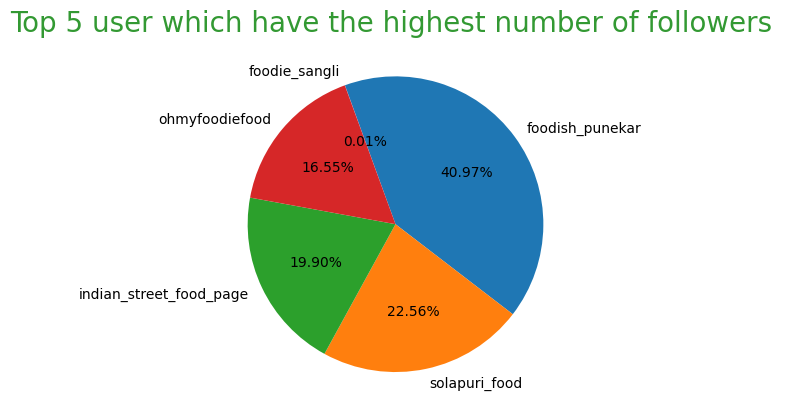

In [135]:
x=res.keys()
y=res.values()
plt.title('Top 5 user which have the highest number of followers ',fontsize=20, color='green',alpha=0.8)
plt.pie(y,labels=x,autopct="%.2f%%",counterclock=False,startangle=110)
plt.show()

2.Now Find the number of posts these handles have done in the previous 3 days.

In [58]:
ans2=[]
for i in res:
  ans2.append(i)

['foodish_punekar',
 'solapuri_food',
 'indian_street_food_page',
 'ohmyfoodiefood',
 'foodie_sangli']

In [87]:
ans3={}
for i in range (len(ans2)):
  search(ans2[i])
  # sleep(7)
  wait.until(Ec.presence_of_element_located((By.CLASS_NAME,'_abm4')))
  btn=driver.find_element(By.CLASS_NAME,'_abm4')
  btn.click()
    # sleep(7)
  wait.until(Ec.presence_of_element_located((By.PARTIAL_LINK_TEXT,'posts')))
  sleep(2)
  posts=driver.find_element(By.XPATH,'//span[@class="_ac2a"]')
  html=posts.get_attribute('innerHTML')

  res=BeautifulSoup(html,'html.parser')
  ans3[ans2[i]]=res.string
  
  btn=driver.find_element(By.CLASS_NAME,'_ab6-')
  btn.click()
  sleep(7)

In [118]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in ans3:
  print(i,"-->",ans3[i].replace(',',''))

Number of posts these handles have done in the previous 3 days : -
foodish_punekar --> 943
solapuri_food --> 3772
indian_street_food_page --> 469
ohmyfoodiefood --> 1411
foodie_sangli --> 7


3. Depict this information using a suitable graph.

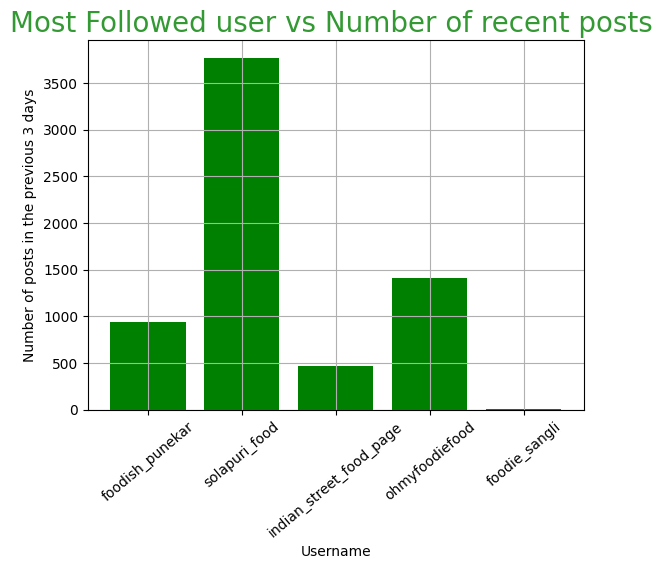

In [137]:
ans4={}
for i in ans3:
  ans4[i]=float(ans3[i].replace(',',''))
x=ans4.keys()
y=ans4.values()
plt.bar(x,y,color='g')
plt.xticks(rotation=40)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()


Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
   Create a csv file with two columns : the word and its frequency
3. Now, find the hashtags that were most popular among these bloggers
4. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

Answer 2

1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [190]:
ans5={}
for i in ans4:
  ans5[i]=int(ans4[i])

In [194]:
ans6={}
for key,value in ans5.items():
  lis=[]
  search(key)
  wait.until(Ec.presence_of_element_located((By.CLASS_NAME,'_abm4')))
  btn=driver.find_element(By.CLASS_NAME,'_abm4')
  btn.click()
  wait.until(Ec.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
  handle=driver.find_element(By.CLASS_NAME,'_aagw')
  handle.click()

  if value<11:
    x=value
  else:
    x=11
  for i in range(x-1):
      wait.until(Ec.presence_of_element_located((By.XPATH,'//button[@class="_abl-"]')))
      HTML = wait.until(Ec.presence_of_element_located((By.CLASS_NAME,'_a9zs')))
      Texts = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('a')
      for i in Texts:
        lis.append(i.text)

      next_btn=driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]//button')
      next_btn.click()
  ans6[key]=lis
  driver.back()
  wait.until(Ec.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
  btn=driver.find_element(By.CLASS_NAME,'_ab6-')
  btn.click()
  sleep(3)

In [189]:
print(ans6)

{'foodish_punekar': ['#pune',
  '#punecity',
  '#punefood',
  '#punelife',
  '#punefoodie',
  '#punerestaurants',
  '#pune_ig',
  '#puneigers',
  '#punefoodblogger',
  '#punestreetfood',
  '#punediaries',
  '#mumbai',
  '#pavbhaji',
  '#vadapav',
  '#pavbhajirecipe',
  '#foodbossindia',
  '#foodtalkindia',
  '#pune',
  '#punecity',
  '#punekar',
  '#puneevents',
  '#punefood',
  '#punefoodie',
  '#punelife',
  '#punerestaurants',
  '#pune_ig',
  '#punetravel',
  '#puneigers',
  '#travellingindia',
  '#familyplace',
  '#foodbossindia',
  '#foodtalkindia',
  '#pune',
  '#punecity',
  '#punefood',
  '#punekar',
  '#punefoodie',
  '#punelife',
  '#punerestaurants',
  '#puneri',
  '#pune_ig',
  '#puneigers',
  '#punestreetfood',
  '#chickenbiryani',
  '#chicken',
  '#mutton',
  '#chickentikka',
  '#foodbossindia',
  '#foodtalkindia',
  '#pune',
  '#punecity',
  '#punefood',
  '#punekar',
  '#punefoodie',
  '#punelife',
  '#punefoodblogger',
  '#punerestaurants',
  '#puneigers',
  '#puneri',

2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [197]:
ans7={}
for i,j in ans6.items():
  for k in j:
    if k in ans7:
      ans7[k]+=1
    else:
      ans7[k]=1
for i,j in ans7.items():
  print(i,"-->",j)

#pune --> 12
#punecity --> 10
#punefood --> 9
#punelife --> 9
#punefoodie --> 11
#punerestaurants --> 7
#pune_ig --> 8
#puneigers --> 9
#punefoodblogger --> 6
#punestreetfood --> 3
#punediaries --> 1
#mumbai --> 1
#pavbhaji --> 2
#vadapav --> 1
#pavbhajirecipe --> 1
#foodbossindia --> 7
#foodtalkindia --> 7
#punekar --> 6
#puneevents --> 1
#punetravel --> 1
#travellingindia --> 1
#familyplace --> 1
#puneri --> 5
#chickenbiryani --> 2
#chicken --> 3
#mutton --> 1
#chickentikka --> 2
#cheeseburger --> 1
#vegburger --> 1
#puneshopping --> 1
#punefashion --> 3
#puneartist --> 1
#vocalforlocal --> 1
#streetfood --> 1
#maharashtra --> 2
#reels --> 2
#reelsinstagram --> 1
#punekars --> 1
#shivajinagar --> 1
#reelsvideo --> 1
#chickenleg --> 1
#chickenfry --> 1
#chickencurry --> 1
#punenightlife --> 1
#puneblogger --> 1
#instagrammable --> 1
#instagrammableplaces --> 1
#lucknowfood --> 1
#lucknowfoodies --> 1
#streetfoodindia --> 1
@theswapnildhage --> 1
@solapuri_food --> 3
@sujit_edito --> 1

3. Create a csv file with two columns : the word and its frequency

In [214]:
word_list=[]
for i,j in ans7.items():
  word_list.append([i,j])
df=pd.DataFrame(word_list,columns=["Words","Frequency"])
df.to_csv('Words_Frequency')

4.Now, find the hashtags that were most popular among these bloggers

In [217]:
sorted(ans7,key=ans7.get,reverse=True)
word_list=[]
for i,j in ans7.items():
  word_list.append([i,j])
print(word_list[0][0])

#pune


5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

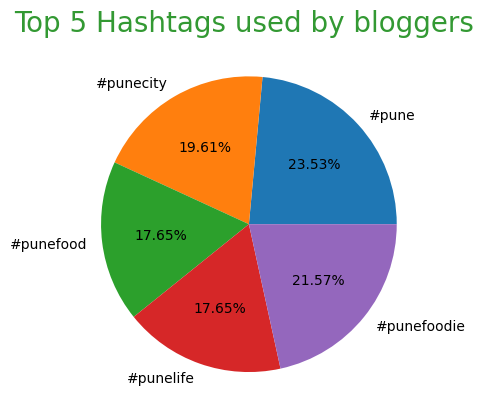

In [223]:
x=[]
y=[]
cnt=1
for i,j in word_list:
  x.append(i)
  y.append(j)
  if cnt==5:
    break
  cnt+=1
plt.pie(y,labels=x,autopct="%.2f%%")
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

3.You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4. Create a bar graph to depict the above obtained information.

Answer 3

1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [249]:
ans8={}
for key in ans2:
  like_sum=0
  search(key)
  wait.until(Ec.presence_of_element_located((By.CLASS_NAME,'_abm4')))
  btn=driver.find_element(By.CLASS_NAME,'_abm4')
  btn.click()
  wait.until(Ec.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
  handle=driver.find_element(By.CLASS_NAME,'_aagw')
  handle.click()

  if value<11:
    x=value
  else:
    x=11
  for i in range(x-1):
      wait.until(Ec.presence_of_element_located((By.PARTIAL_LINK_TEXT,'likes')))
      # HTML = wait.until(Ec.presence_of_element_located((By.CLASS_NAME,'_a9zs')))
      # Texts = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('a')
      # for i in Texts:
      a=driver.find_element(By.PARTIAL_LINK_TEXT,'likes')
      like_sum+=int(a.text.split(' ')[0].replace(',',''))
      next_btn=driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]//button')
      next_btn.click()
  ans8[key]=like_sum
  driver.back()
  wait.until(Ec.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
  btn=driver.find_element(By.CLASS_NAME,'_ab6-')
  btn.click()
  sleep(3)

In [252]:
print("Total likes of the 5 handels of the top 10 posts:")
for i,j in ans8.items():
  print(i,"--->",j,"  likes")

Total likes of the 5 handels of the top 10 posts:
foodish_punekar ---> 40379   likes
solapuri_food ---> 16440   likes
indian_street_food_page ---> 4226   likes
ohmyfoodiefood ---> 19532   likes
foodie_sangli ---> 43   likes


2. Calculate the average likes for a handle.

In [255]:
ans9={}
for i,j in ans8.items():
  ans9[i]=j//10


print("The average likes for a handle: ")
print()
for i,j in ans8.items():
  print(i,'-->',j)

The average likes for a handle: 

foodish_punekar --> 40379
solapuri_food --> 16440
indian_street_food_page --> 4226
ohmyfoodiefood --> 19532
foodie_sangli --> 43


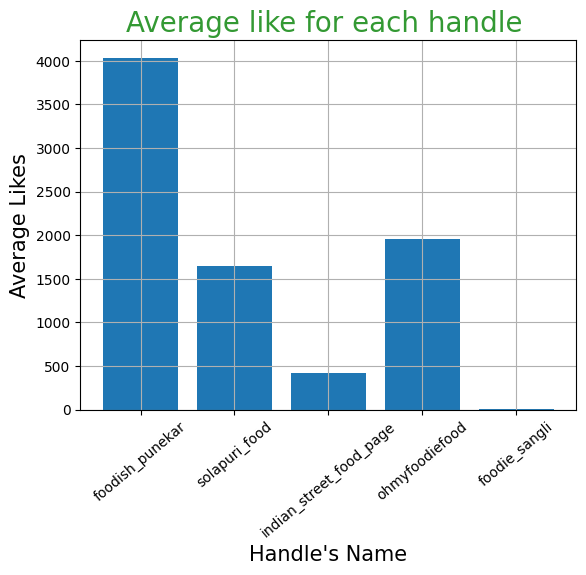

In [268]:
x=ans9.keys()
y=ans9.values()
plt.bar(x,y)
plt.xticks(rotation=40)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.grid()
plt.show()

3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [264]:
ans5
ans10={}
for i,j in ans9.items():
  ans10[i]=j//ans5[i]

print("average like to followers ratio: ")
print()
for i,j in ans10.items():
  print(i,'-->',j)

average like to followers ratio: 

foodish_punekar --> 4
solapuri_food --> 0
indian_street_food_page --> 0
ohmyfoodiefood --> 1
foodie_sangli --> 0


4. Create a bar graph to depict the above obtained information.

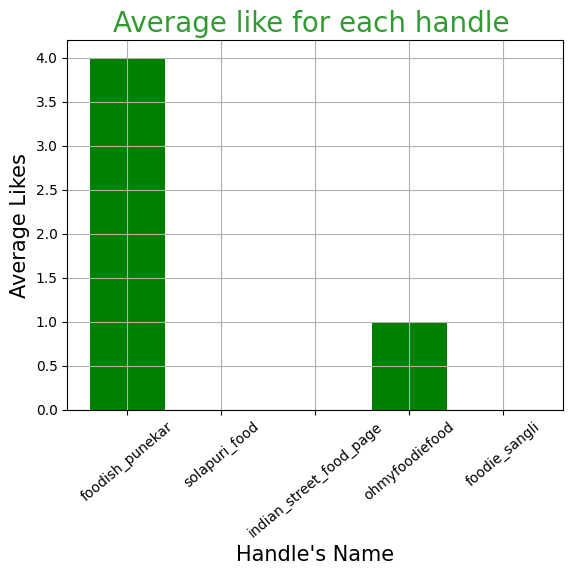

In [270]:
x=ans10.keys()
y=ans10.values()
plt.bar(x,y,color='g')
plt.xticks(rotation=40)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.grid()
plt.show()